<a href="https://colab.research.google.com/github/baguspurnama98/lmknn-python/blob/main/Tugas_2_Kecerdasan_Komputasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#KNN

In [ ]:
import scipy.spatial
from collections import Counter

class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        return scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            
            d = d[0:self.k]
            for d, j in d:
                votes.append(self.y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
      predictions = self.predict(X_test)
      value = 0
      for i in range(len(y_test)):
        if(predictions[i] == y_test[i]):
          value += 1
      return value / len(y_test)

#LMKNN

In [ ]:
import scipy.spatial
import numpy as np
from operator import itemgetter

from collections import Counter
class LMKNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
      return scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        myclass = list(set(self.y_train))
        for i in range(len(X_test)):
            eucDist = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                eucDist.append([dist, j, self.y_train[j]])
            eucDist.sort()
            
            minimum_dist_per_class = []
            for c in myclass:
              minimum_class = []
              for di in range(len(eucDist)):
                if(len(minimum_class) != self.k):
                  if(eucDist[di][2] == c):
                    minimum_class.append(eucDist[di])
                else:
                  break
              minimum_dist_per_class.append(minimum_class)
           
            indexData = []
            for a in range(len(minimum_dist_per_class)):
              temp_index = []
              for j in range(len(minimum_dist_per_class[a])):
                temp_index.append(minimum_dist_per_class[a][j][1])
              indexData.append(temp_index)

            centroid = []
            for a in range(len(indexData)):
              transposeData = X_train[indexData[a]].T
              tempCentroid = []
              for j in range(len(transposeData)):
                tempCentroid.append(np.mean(transposeData[j]))
              centroid.append(tempCentroid)
            centroid = np.array(centroid)
           
            eucDist_final = []
            for b in range(len(centroid)):
              dist = scipy.spatial.distance.euclidean(centroid[b] , X_test[i])
              eucDist_final.append([dist, myclass[b]])
            sorted_eucDist_final = sorted(eucDist_final, key=itemgetter(0))
            final_output.append(sorted_eucDist_final[0][1])
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        value = 0
        for i in range(len(y_test)):
          if(predictions[i] == y_test[i]):
            value += 1
        return value / len(y_test)

#Klasifikasi



#Heart Failure

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/heart_failure_clinical_records_dataset.csv'
data_train = pd.read_csv(train_path)
data_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##Check Missing Value

In [ ]:
for col in data_train.columns:
    print(col, str(round(100* data_train[col].isnull().sum() / len(data_train), 2)) + '%')

age 0.0%
anaemia 0.0%
creatinine_phosphokinase 0.0%
diabetes 0.0%
ejection_fraction 0.0%
high_blood_pressure 0.0%
platelets 0.0%
serum_creatinine 0.0%
serum_sodium 0.0%
sex 0.0%
smoking 0.0%
time 0.0%
DEATH_EVENT 0.0%


##Preprocessing

In [ ]:
data_train.drop('time',axis=1, inplace=True)
print(data_train.columns.tolist())

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT']


In [ ]:
label_train = data_train['DEATH_EVENT'].to_numpy()
fitur_train = data_train[[ 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium']].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)
print(fitur_train_normalize[0])

[0.         0.07131921 0.         0.09090909 1.         0.29082313
 0.15730337 0.48571429]


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(fitur_train, label_train, random_state=42, stratify=label_train, test_size=0.2  )

##Klasifikasi with k = 3

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

acc_LMKNN_heart = [] 
acc_KNN_heart = [] 
for train_index, test_index in kf.split(fitur_train_normalize,label_train):
  knn = KNN(3)
  lmknn = LMKNN(3)
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  knn.fit(X_train,y_train)
  prediction = knn.score(X_test, y_test)
  acc_KNN_heart.append(prediction)

  lmknn.fit(X_train, y_train) 
  result = lmknn.score(X_test, y_test)
  acc_LMKNN_heart.append(result)
print(np.mean(acc_KNN_heart))
print(np.mean(acc_LMKNN_heart))


0.7224137931034482
0.7060919540229885


##Result of the Sensitivity to the Neighborhood Size K

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

K = range(2,15)
result_KNN_HR = []
result_LMKNN_HR = []

for k in K :
  acc_LMKNN_heart = [] 
  acc_KNN_heart = [] 
  for train_index, test_index in kf.split(fitur_train_normalize,label_train):
    knn = KNN(k)
    lmknn = LMKNN(k)
    X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
    y_train, y_test = label_train[train_index], label_train[test_index]

    knn.fit(X_train,y_train)
    prediction = knn.score(X_test, y_test)
    acc_KNN_heart.append(prediction)

    lmknn.fit(X_train, y_train) 
    result = lmknn.score(X_test, y_test)
    acc_LMKNN_heart.append(result)
  result_KNN_HR.append(np.mean(acc_KNN_heart))
  result_LMKNN_HR.append(np.mean(acc_LMKNN_heart))
print('KNN : ',result_KNN_HR)
print('LMKNN : ',result_LMKNN_HR)


KNN :  [0.6688505747126436, 0.7186206896551723, 0.7325287356321838, 0.6888505747126437, 0.7191954022988505, 0.6925287356321839, 0.7024137931034483, 0.6958620689655172, 0.689080459770115, 0.6822988505747126, 0.6725287356321838, 0.682528735632184, 0.6658620689655173]
LMKNN :  [0.6694252873563218, 0.705287356321839, 0.7326436781609196, 0.699080459770115, 0.688735632183908, 0.695977011494253, 0.6718390804597701, 0.6991954022988506, 0.6960919540229885, 0.6890804597701149, 0.6656321839080459, 0.7059770114942528, 0.6820689655172413]


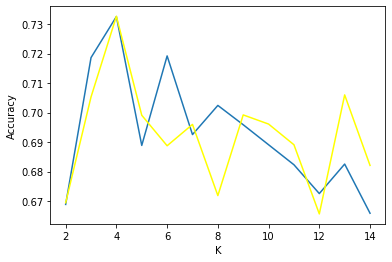

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,15), result_KNN_HR)
plt.plot(range(2,15), result_LMKNN_HR, color="yellow")
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()


#Iris

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/iris.csv'
data_train = pd.read_csv(train_path)
data_train.head()

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Check Missing Value

In [ ]:
for col in data_train.columns:
    print(col, str(round(100* data_train[col].isnull().sum() / len(data_train), 2)) + '%')

SL 0.0%
SW 0.0%
PL 0.0%
PW 0.0%
Class 0.0%


##Preprocessing

In [ ]:
print(data_train.columns.tolist())

['SL', 'SW', 'PL', 'PW', 'Class']


In [ ]:
label_train = data_train['Class'].to_numpy()
fitur_train = data_train[['SL', 'SW', 'PL', 'PW']].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)
print(fitur_train_normalize[0])
fitur_train = fitur_train_normalize

[0.22222222 0.625      0.06779661 0.04166667]


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(fitur_train, label_train, random_state=42, stratify=label_train, test_size=0.2  )

##Klasifikasi with k = 3

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True) 
kf.get_n_splits(fitur_train)
acc_LMKNN_heart = [] 
acc_KNN_heart = [] 

for train_index, test_index in kf.split(fitur_train, label_train):
  knn = KNN(3)
  lmknn = LMKNN(3)
  X_train, X_test = fitur_train[train_index], fitur_train[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  knn.fit(X_train,y_train)
  prediction = knn.score(X_test, y_test)
  acc_KNN_heart.append(prediction)
 
  lmknn.fit(X_train, y_train) 
  result = lmknn.score(X_test, y_test)
  acc_LMKNN_heart.append(result)

print('KNN : ',np.mean(acc_KNN_heart))
print('LMKNN : ',np.mean(acc_LMKNN_heart))

KNN :  0.95
LMKNN :  0.9583333333333333


##Result of the Sensitivity to the Neighborhood Size K

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

K = range(2,15)
result_KNN_IR = []
result_LMKNN_IR = []

for k in K :
  acc_LMKNN_heart = [] 
  acc_KNN_heart = [] 
  for train_index, test_index in kf.split(fitur_train_normalize,label_train):
    knn = KNN(k)
    lmknn = LMKNN(k)
    X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
    y_train, y_test = label_train[train_index], label_train[test_index]

    knn.fit(X_train,y_train)
    prediction = knn.score(X_test, y_test)
    acc_KNN_heart.append(prediction)

    lmknn.fit(X_train, y_train) 
    result = lmknn.score(X_test, y_test)
    acc_LMKNN_heart.append(result)
  result_KNN_IR.append(np.mean(acc_KNN_heart))
  result_LMKNN_IR.append(np.mean(acc_LMKNN_heart))
print('KNN : ',result_KNN_IR)
print('LMKNN : ',result_LMKNN_IR)


KNN :  [0.95, 0.9416666666666667, 0.9416666666666667, 0.9583333333333333, 0.9583333333333333, 0.95, 0.95, 0.95, 0.9416666666666667, 0.9416666666666667, 0.95, 0.9416666666666667, 0.95]
LMKNN :  [0.975, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.95, 0.95, 0.95, 0.95, 0.9416666666666667, 0.9499999999999998, 0.95, 0.95, 0.95]


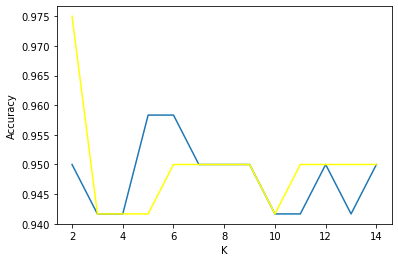

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,15), result_KNN_IR)
plt.plot(range(2,15), result_LMKNN_IR, color="yellow")
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()


#Diabetes

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/diabetes.csv'
data_train = pd.read_csv(train_path)
data_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Check Missing Value

In [ ]:
for col in data_train.columns:
    print(col, str(round(100* data_train[col].isnull().sum() / len(data_train), 2)) + '%')

Pregnancies 0.0%
Glucose 0.0%
BloodPressure 0.0%
SkinThickness 0.0%
Insulin 0.0%
BMI 0.0%
DiabetesPedigreeFunction 0.0%
Age 0.0%
Outcome 0.0%


##Preprocessing

In [ ]:
print(data_train.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
label_train = data_train['Outcome'].to_numpy()
fitur_train = data_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)
print(fitur_train_normalize[0])

[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
 0.23441503 0.48333333]


##Klasifikasi

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
acc_LMKNN_heart = [] 
acc_KNN_heart = [] 

for train_index, test_index in kf.split(fitur_train_normalize,label_train):
  knn = KNN(3)
  lmknn = LMKNN(3)
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  knn.fit(X_train,y_train)
  prediction = knn.score(X_test, y_test)
  acc_KNN_heart.append(prediction)
 
  lmknn.fit(X_train, y_train) 
  result = lmknn.score(X_test, y_test)
  acc_LMKNN_heart.append(result)

print('KNN : ',np.mean(acc_KNN_heart))
print('LMKNN : ',np.mean(acc_LMKNN_heart))

KNN :  0.7357484620642516
LMKNN :  0.7018626110731374


##Result of the Sensitivity to the Neighborhood Size K

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

K = range(2,15)
result_KNN_D = []
result_LMKNN_D = []

for k in K :
  acc_LMKNN_heart = [] 
  acc_KNN_heart = [] 
  for train_index, test_index in kf.split(fitur_train_normalize,label_train):
    knn = KNN(k)
    lmknn = LMKNN(k)
    X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
    y_train, y_test = label_train[train_index], label_train[test_index]

    knn.fit(X_train,y_train)
    prediction = knn.score(X_test, y_test)
    acc_KNN_heart.append(prediction)

    lmknn.fit(X_train, y_train) 
    result = lmknn.score(X_test, y_test)
    acc_LMKNN_heart.append(result)
  result_KNN_D.append(np.mean(acc_KNN_heart))
  result_LMKNN_D.append(np.mean(acc_LMKNN_heart))
print('KNN : ',result_KNN_D)
print('LMKNN : ',result_LMKNN_D)


KNN :  [0.7160970608339029, 0.7499829118250171, 0.7408065618591934, 0.7343130553656869, 0.7240601503759398, 0.740909090909091, 0.7356117566643883, 0.7342959671907041, 0.7240088858509911, 0.7460184552289816, 0.7356117566643883, 0.7435235816814764, 0.7604237867395763]
LMKNN :  [0.7252221462747779, 0.6926691729323308, 0.7291524265208477, 0.7212747778537252, 0.724025974025974, 0.7278537252221463, 0.759125085440875, 0.7447368421052631, 0.7461551606288449, 0.7668318523581681, 0.7655502392344496, 0.7642173615857827, 0.7629186602870812]


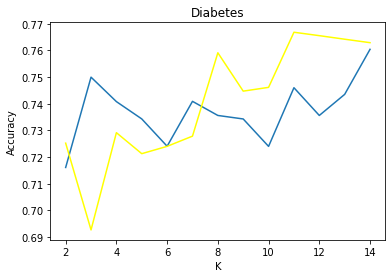

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,15), result_KNN_D)
plt.plot(range(2,15), result_LMKNN_D, color="yellow")
plt.title("Diabetes")
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()


#Breast Cancer

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/data_breast_cancer.csv'
data_train = pd.read_csv(train_path)
data_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


###Check Missing Value

In [ ]:
data_train.drop('id',axis=1, inplace=True)
for col in data_train.columns:
    print(col, str(round(100* data_train[col].isnull().sum() / len(data_train), 2)) + '%')

diagnosis 0.0%
radius_mean 0.0%
texture_mean 0.0%
perimeter_mean 0.0%
area_mean 0.0%
smoothness_mean 0.0%
compactness_mean 0.0%
concavity_mean 0.0%
concave points_mean 0.0%
symmetry_mean 0.0%
fractal_dimension_mean 0.0%
radius_se 0.0%
texture_se 0.0%
perimeter_se 0.0%
area_se 0.0%
smoothness_se 0.0%
compactness_se 0.0%
concavity_se 0.0%
concave points_se 0.0%
symmetry_se 0.0%
fractal_dimension_se 0.0%
radius_worst 0.0%
texture_worst 0.0%
perimeter_worst 0.0%
area_worst 0.0%
smoothness_worst 0.0%
compactness_worst 0.0%
concavity_worst 0.0%
concave points_worst 0.0%
symmetry_worst 0.0%
fractal_dimension_worst 0.0%
Unnamed: 32 100.0%


##Preprocessing

In [ ]:
print(data_train.columns.tolist())

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [ ]:
label_train = data_train['diagnosis'].to_numpy()
fitur_train = data_train[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)
print(fitur_train_normalize[0])

[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
 0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
 0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
 0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
 0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]


##Klasifikasi

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
acc_LMKNN_heart = [] 
acc_KNN_heart = [] 

for train_index, test_index in kf.split(fitur_train_normalize,label_train):
  knn = KNN(3)
  lmknn = LMKNN(3)
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  knn.fit(X_train,y_train)
  prediction = knn.score(X_test, y_test)
  acc_KNN_heart.append(prediction)
 
  lmknn.fit(X_train, y_train) 
  result = lmknn.score(X_test, y_test)
  acc_LMKNN_heart.append(result)

print('KNN : ',np.mean(acc_KNN_heart))
print('LMKNN : ',np.mean(acc_LMKNN_heart))

KNN :  0.9683897243107771
LMKNN :  0.9736528822055138


##Result of the Sensitivity to the Neighborhood Size K

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

K = range(2,15)
result_KNN_BC = []
result_LMKNN_BC = []

for k in K :
  acc_LMKNN_heart = [] 
  acc_KNN_heart = [] 
  for train_index, test_index in kf.split(fitur_train_normalize,label_train):
    knn = KNN(k)
    lmknn = LMKNN(k)
    X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
    y_train, y_test = label_train[train_index], label_train[test_index]

    knn.fit(X_train,y_train)
    prediction = knn.score(X_test, y_test)
    acc_KNN_heart.append(prediction)

    lmknn.fit(X_train, y_train) 
    result = lmknn.score(X_test, y_test)
    acc_LMKNN_heart.append(result)
  result_KNN_BC.append(np.mean(acc_KNN_heart))
  result_LMKNN_BC.append(np.mean(acc_LMKNN_heart))
print('KNN : ',result_KNN_BC)
print('LMKNN : ',result_LMKNN_BC)


KNN :  [0.9559837092731829, 0.9719298245614034, 0.9666353383458647, 0.9666040100250626, 0.9683897243107769, 0.9666040100250625, 0.9735588972431077, 0.9701441102756891, 0.9683583959899748, 0.9683270676691729, 0.9701441102756891, 0.9648182957393484, 0.9718984962406015]
LMKNN :  [0.96124686716792, 0.9648809523809524, 0.9648496240601503, 0.963095238095238, 0.9666353383458647, 0.9718984962406015, 0.975344611528822, 0.9771303258145363, 0.9735588972431077, 0.9736215538847116, 0.9789160401002507, 0.9736215538847116, 0.9754072681704262]


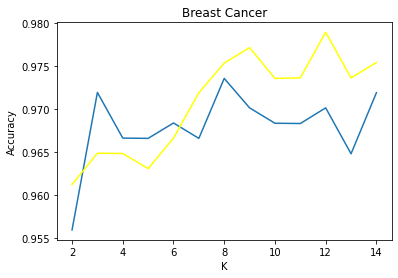

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,15), result_KNN_BC)
plt.plot(range(2,15), result_LMKNN_BC, color="yellow")
plt.title("Breast Cancer")
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()


#Summary

In [ ]:
import pandas as pd
data = {'Data':  ['Heart Failure', 'Iris', 'Diabetes','Breast Cancer'],
        'KNN':  [0.7224137931034482, 0.95,0.7357484620642516,0.9683897243107771],
        'LMKNN':  [0.7060919540229885, 0.9583333333333333,0.7018626110731374, 0.9736528822055138],
        }
df = pd.DataFrame (data, columns = ['Data','KNN','LMKNN'])
print(df)
print('Rata-rata :',np.mean([0.7224137931034482, 0.95,0.7357484620642516,0.9683897243107771]), np.mean([0.7060919540229885, 0.9583333333333333,0.7018626110731374, 0.9736528822055138]) )

            Data       KNN     LMKNN
0  Heart Failure  0.722414  0.706092
1           Iris  0.950000  0.958333
2       Diabetes  0.735748  0.701863
3  Breast Cancer  0.968390  0.973653
Rata-rata : 0.8441379948696193 0.8349851951587434


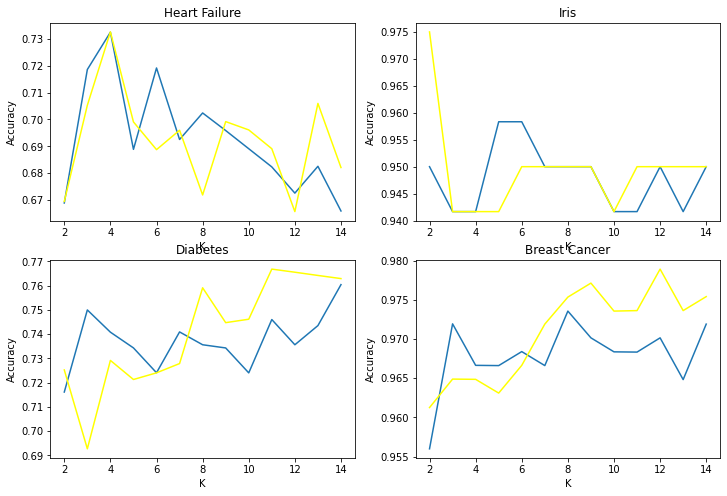

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

axs[0, 0].plot(range(2,15), result_KNN_HR)
axs[0, 0].plot(range(2,15), result_LMKNN_HR, color="yellow")
axs[0, 0].set_title("Heart Failure")

axs[0, 1].plot(range(2,15), result_KNN_IR)
axs[0, 1].plot(range(2,15), result_LMKNN_IR, color="yellow")
axs[0, 1].set_title("Iris")

axs[1, 0].plot(range(2,15), result_KNN_D)
axs[1, 0].plot(range(2,15), result_LMKNN_D, color="yellow")
axs[1, 0].set_title("Diabetes")

axs[1, 1].plot(range(2,15), result_KNN_BC)
axs[1, 1].plot(range(2,15), result_LMKNN_BC, color="yellow")
axs[1, 1].set_title("Breast Cancer")

for ax in axs.flat:
    ax.set(xlabel='K', ylabel='Accuracy')
